<a href="http://www.stfc.ac.uk/"> <img src="../../img/STFCLargeColour.jpg" width="50%" align="left"/></a>
<a href="https://www.addopt.org/"><img src="../../img/ADDoPT-logo-MAIN-with-text.png" width="300" height="200" align="right"/></a>


# Support Vector Machines: how they work

We will do a series of classification problems, starting with an easy one.

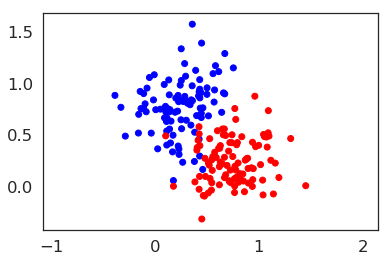

In [3]:
#import statements
import sys
sys.path.append("../../lib/")
import models

import sklearn
import matplotlib.pyplot as plt
import numpy, pandas, random

numberOfRows=200
data = pandas.DataFrame(index=range(0, numberOfRows), columns=('x1', 'x2', 'y') )

# add blue points
for i in range(0,numberOfRows//2):
    data.loc[i] = [random.gauss(0.25, 0.25) , random.gauss(0.75, 0.25) , 1]

# add red points
for i in range(numberOfRows//2, numberOfRows):
    data.loc[i] = [random.gauss(0.75, 0.25) , random.gauss(0.25, 0.25) , -1]
   
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(data.x1, data.x2, s=None, 
         c=data.y.apply(lambda y: 'blue' if 1==y else 'red')
        # marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
        # linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs
        )
plt.show()

For this problem, the two sets are well centred and fairly well separated. 

We calculate the empirical centres of the two sets, and their midpoint. Then we calculate the vector $a$ from one centre to the other. 

In [4]:
def centres(data):
    cplus = ( data[1==data.y].x1.mean(), data[1==data.y].x2.mean()  )
    cminus = ( data[-1==data.y].x1.mean(), data[-1==data.y].x2.mean()  )
    midpoint = ( (cplus[0]+cminus[0])/2, (cplus[0]+cminus[0])/2 )
    a = ( cplus[0]-cminus[0], cplus[1]-cminus[1] )
    return (cplus, cminus, midpoint, a)
(cplus, cminus, midpoint, a) = centres(data)
a

(-0.5009552873667846, 0.522607313291775)

Writing $n_{+1}$ and $n_{-1}$ for the sizes of the two sets, we have:
$$ a = cplus-cminus 
= \frac{1}{n_+} \sum_{y_i=1}^{}{x_i}_+ - \frac{1}{n_-}\sum_{y_i=-1}{^{}x_i}  $$
$$= \sum{w_i y_i x_i}$$
where:
$$w_i = \frac{1}{n_{y_i}}$$

For any point x, consider the dot product
$$    < x - midpoint, a > $$
If this is zero, then the line from the midpoint to $x$ is at right angles to $a$. Such points $x$ form a line separating the plane into two regions. When the dot product is positive we can predict y=1, and when it is negative we can predict y=-1. So our predictor for the class y==1 is:
$$    {< x - midpoint, a>} > 0 $$
Put $b=<midpoint,w>$. Then the predictor is:
$$      < x,a> - b > 0 $$
We can use the result above, and the fact that dot product is bilinear, to work out
$$<x,a> = <x, \sum{w_i y_i x_i}> = \sum{w_i y_i <x, x_i>}$$
This is the non-parametric Parzen estimator.

In [5]:
def predict(x1, x2):
    return 1 if 0 <  a[0]*(x1-midpoint[0]) + a[1]*(x2-midpoint[1]) else -1
# compute accuracy
def score(data):
    return sum([ row.y == predict(row.x1, row.x2) for row in data.itertuples()]) / len(data)
score(data)

0.955

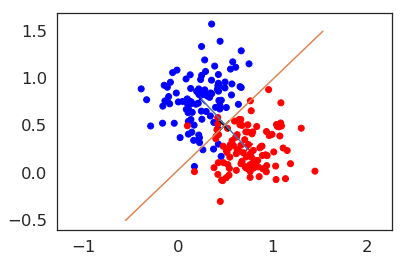

In [6]:
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(data.x1, data.x2, s=None, 
         c=data.y.apply(lambda y: 'blue' if 1==y else 'red')
        # marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
        # linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs
        )
plt.scatter([cplus[0], cminus[0], midpoint[0]], [cplus[1], cminus[1], midpoint[1]], 
        s=[100, 100, 100], 
        c=['blue', 'red', 'black'], marker='x'
        # cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
        # linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs
        )
plt.plot(cminus, cplus)
plt.plot([midpoint[0]+2*a[1], midpoint[0]-2*a[1]], [ midpoint[1]-2*a[0], midpoint[1]+2*a[0]])
plt.show()

## Problem 2

In the next case, there is a linear decision boundary but this method fails to find it.

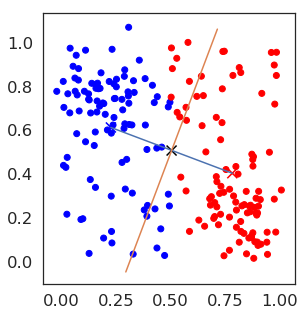

0.915

In [7]:

data = pandas.DataFrame(index=range(0, numberOfRows), columns=('x1', 'x2', 'y') )

for i in range(0,numberOfRows//4):
    data.loc[i] = [random.gauss(0.2, 0.1) , random.gauss(0.75, 0.1) , 1]

for i in range(numberOfRows//4, numberOfRows//2):
    data.loc[i] = [random.gauss(0.8, 0.1) , random.gauss(0.25, 0.1) , -1]

for i in range(numberOfRows//2,3*numberOfRows//4):
    data.loc[i] = [random.uniform(0, 0.50) , random.uniform(0, 1) , 1]

for i in range(3*numberOfRows//4, numberOfRows):
    data.loc[i] = [random.uniform(0.50, 1.0) , random.uniform(0, 1) , -1]

# try the first method
(cplus, cminus, midpoint, a) = centres(data)

plt.figure(figsize=(5,5))
plt.axes().set_aspect('equal')
plt.scatter(data.x1, data.x2, s=None, 
         c=data.y.apply(lambda y: 'blue' if 1==y else 'red')
        # marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
        # linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs
        )
plt.scatter([cplus[0], cminus[0], midpoint[0]], [cplus[1], cminus[1], midpoint[1]], 
        s=[100, 100, 100], 
        c=['blue', 'red', 'black'], marker='x'
        # cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
        # linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs
        )
plt.plot([cplus[0], cminus[0]], [cplus[1], cminus[1]])
plt.plot([midpoint[0]+a[1], midpoint[0]-a[1]], [ midpoint[1]-a[0], midpoint[1]+a[0]])
plt.show()
score(data)

Now the clusters at top left and bottom right have distorted the decision bounday. There is still a good predictor of the form:
$$     \sum{w_i y_i <x, x_i>} - b > 0 $$
but the weights have to be chosed in a more sophisiticated way.  
Choosing suitable $w_i$ to minimise the number of errors is a linear optimisation problem. The linear SVM algorithm will solve it for us.

Points in the clusters at top left and bottom right are irrelevant, because they are far from the decision boundary. Their weights are zero. Points with a non-zero weight are called "support vectors". They are shown larger in the plot below.

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


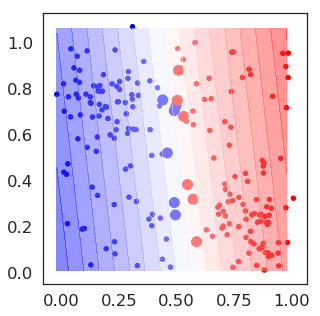

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.99

In [8]:
import matplotlib
cmap= matplotlib.colors.LinearSegmentedColormap.from_list('decision', [
   (0, [1,0,0]), (0.497,[1,1,1]) ,(0.5,[0,0,0]) ,(0.503,[1,1,1]) , (1, [0,0,1])
])
def contour(model, data):
    xx, yy = numpy.meshgrid( numpy.arange(min(data.x1),max(data.x1),0.05), numpy.arange(min(data.x2),max(data.x2),0.05) )
    mesh = numpy.c_[ xx.ravel(), yy.ravel() ]
    z = model.decision_function( mesh ).reshape(xx.shape)
    plt.contourf(xx, yy, z, 20, alpha=0.5, cmap=cmap)

    
from sklearn import svm
from sklearn.svm import NuSVC
model = svm.NuSVC(kernel='linear', nu=10/200) 
model.fit(
        data[['x1', 'x2']].as_matrix(),
        data.y==1
)


plt.figure(figsize=(5,5))
plt.axes().set_aspect('equal')
plt.scatter(data.x1, data.x2, 
         c=data.y.apply(lambda y: 'blue' if 1==y else 'red'),
         s=[100 if i in model.support_ else 20 for i in range(0, len(data) )]
        # marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
        # linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs
        )
contour(model, data)
plt.show()
model.score(
        data[['x1', 'x2']].as_matrix(),
        data.y==1
)


## Problem 3
This second method works less well if the decision boundary is curved.

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


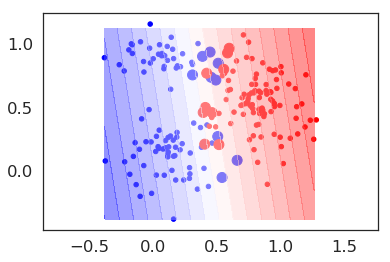

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.93

In [9]:

data = pandas.DataFrame(index=range(0, 200), columns=('x1', 'x2', 'y') )

for i in range(0,40):
    data.loc[i] = [random.gauss(0.1, 0.2) , random.gauss(0.9, 0.1) , 1]


for i in range(40, 100):
    data.loc[i] = [random.gauss(0.1, 0.2) , random.gauss(0.1, 0.15) , 1]

for i in range(100, 200):
    data.loc[i] = [random.gauss(0.8, 0.2) , random.gauss(0.5, 0.2) , -1]

model = svm.NuSVC(kernel='linear', 
                  nu=15/200 # 15 support vectors should be plenty to find a straight line
                 ) 
model.fit(
        data[['x1', 'x2']].as_matrix(),
        data.y==1
)

plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(data.x1, data.x2, 
         c=data.y.apply(lambda y: 'blue' if 1==y else 'red'),            
         s=[100 if i in model.support_ else 20 for i in range(0, len(data) )]
        )
contour(model, data)
plt.show()

model.score(
        data[['x1', 'x2']].as_matrix(),
        data.y==1
)


## Problem 3, with RBF kernel
So let's try the Radial Basis Function.

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


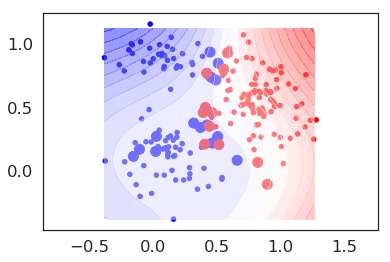

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.945

In [10]:

model = svm.NuSVC(kernel='rbf', nu=15/200) 
model.fit(
        data[['x1', 'x2']].as_matrix(),
        data.y==1
)

plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(data.x1, data.x2, 
         c=data.y.apply(lambda y: 'blue' if 1==y else 'red'),            
         s=[100 if i in model.support_ else 20 for i in range(0, len(data) )]
        # marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
        # linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs
        )
contour(model, data)
plt.show()


model.score(
        data[['x1', 'x2']].as_matrix(),
        data.y==1
)

In [11]:
S = model.support_vectors_[0]
w = model.dual_coef_[0]
b = model.intercept_[0]
# the reason for the [0] above is that nuSVC can also be used for multi-class problems

The decision function is:
$$ x \to \sum_{i=1}^{i=|S|}{w_i rbf(s_i, x)} > b$$
An efficient, linear optimisation has solved a non-linear problem.

## Exercise: Develop and visualize a classifier for the following problem

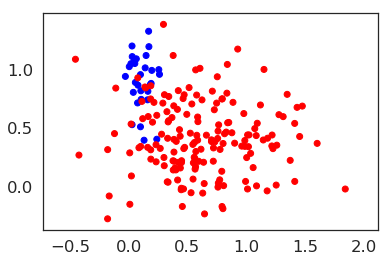

In [12]:
data = pandas.DataFrame(index=range(0, 200), columns=('x1', 'x2', 'y') )

for i in range(0,30):
    data.loc[i] = [random.gauss(0.1, 0.1) , random.gauss(0.9, 0.2) , 1]

for i in range(30, 200):
    data.loc[i] = [random.gauss(0.6, 0.4) , random.gauss(0.4, 0.3) , -1]

# model = 

plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(data.x1, data.x2, 
         c=data.y.apply(lambda y: 'blue' if 1==y else 'red')
        )
#  contour(model, data)
plt.show()

In [ ]:
# your code here

## Further reading

For more information on the topics covered here:
    
1. [Chen, Lin, and Schoelkopf, A tutorial on $v$-Support Vector Machines](https://www.csie.ntu.edu.tw/~cjlin/papers/nusvmtutorial.pdf)
2. [Comparison of sklearn classifiers](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[Up](../)
[Back](Fingerprint-Nearest.ipynb) [Next](SVC.ipynb) [SVR](SVR.ipynb)

---------------------------------------------------
Copyright STFC 2018